<a href="https://colab.research.google.com/github/Idybaz/NLP-task/blob/main/MedicalTextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PACKAGES AND LIBRARIES INSTALLATION**

**Installing packages:**   
The necessary packages are installed in my environment:

In [28]:
!pip install nltk
!pip install scikit-learn
!pip install seaborn
!pip install contractions

**Import Libraries:**   
The required libraries for data manipulation, visualization, and modeling were imported.

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import re
import string
import contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import gc
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


**Download NLTK Resources:**   
The required resources from NLTK were downloaded.

In [30]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **EXPLORATORY DATA ANALYSIS**

**Load Dataset**   
The path to the dataset is defined and loaded into a DataFrame.

In [4]:
# Load the dataset from a file
file_path = '/content/drive/MyDrive/Medical_text.csv'
medical_file = pd.read_csv(file_path)

# Show the column names and the first few rows of the data
print("The columns in the dataset are:")
print(medical_file.columns)
print("Here are the first few rows of the dataset:")
medical_file.head()

The columns in the dataset are:
Index(['Description', 'Medical_Specialty', 'Sample_Name', 'Transcription',
       'Keywords'],
      dtype='object')
Here are the first few rows of the dataset:


,Description,Medical_Specialty,Sample_Name,Transcription,Keywords
0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


**Categorizing Medical Transcriptions:**  
This section of code shows the total number of unique specialties and the number of medical transcription.

In [42]:
# Print total number of medical specialties
total_specialties = medical_file['Medical_Specialty'].nunique()
total_samples = len(medical_file)

print("Total number of medical specialties: " + str(total_specialties))
print("Total number of transcription samples: " + str(total_samples))

# Group data by medical specialty and print the category counts
medical_specialty_categories = medical_file.groupby('Medical_Specialty')

i = 1
print('===========All Medical Specialty =======================')
for catName, dataCategory in medical_specialty_categories:
    print('Cat:' + str(i) + ' ' + catName + ' : ' + str(len(dataCategory)))
    i = i + 1


Total number of medical specialties: 40
Total number of transcription samples: 4966
===========All Medical Specialty =======================
Cat:1  Allergy / Immunology : 7
Cat:2  Autopsy : 8
Cat:3  Bariatrics : 18
Cat:4  Cardiovascular / Pulmonary : 371
Cat:5  Chiropractic : 14
Cat:6  Consult - History and Phy. : 516
Cat:7  Cosmetic / Plastic Surgery : 27
Cat:8  Dentistry : 27
Cat:9  Dermatology : 29
Cat:10  Diets and Nutritions : 10
Cat:11  Discharge Summary : 108
Cat:12  ENT - Otolaryngology : 96
Cat:13  Emergency Room Reports : 75
Cat:14  Endocrinology : 19
Cat:15  Gastroenterology : 224
Cat:16  General Medicine : 259
Cat:17  Hematology - Oncology : 90
Cat:18  Hospice - Palliative Care : 6
Cat:19  IME-QME-Work Comp etc. : 16
Cat:20  Lab Medicine - Pathology : 8
Cat:21  Letters : 23
Cat:22  Nephrology : 81
Cat:23  Neurology : 223
Cat:24  Neurosurgery : 94
Cat:25  Obstetrics / Gynecology : 155
Cat:26  Office Notes : 50
Cat:27  Ophthalmology : 83
Cat:28  Orthopedic : 355
Cat:29  Pain 

**Displaying All Medical Transcription Specialty:**   

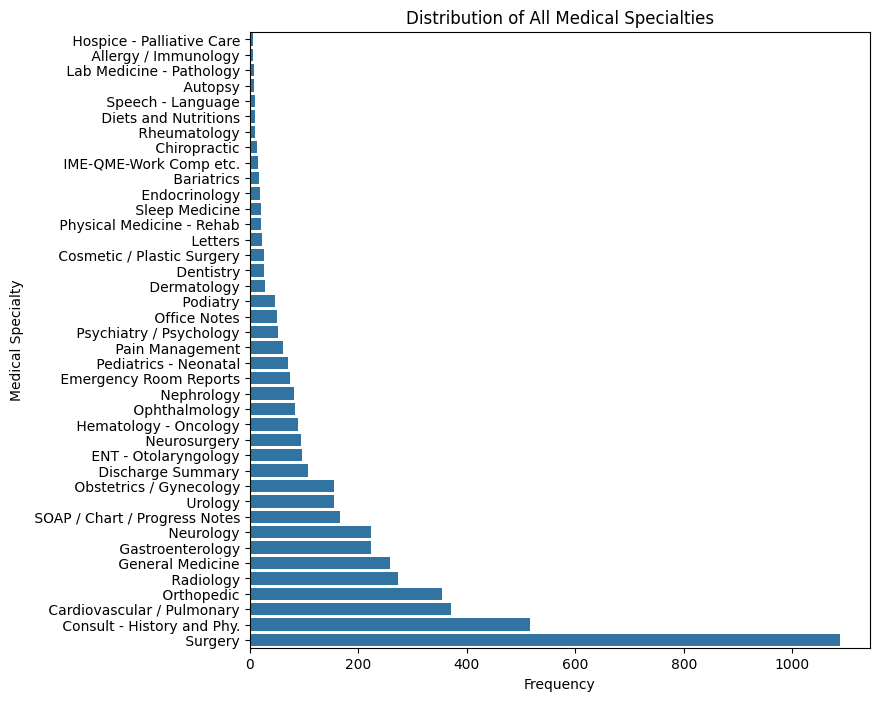

In [43]:
# Plot filtered distribution sorted by count
sorted_data = medical_specialty_categories['Medical_Specialty'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(8, 8))
sns.barplot(x=sorted_data.values, y=sorted_data.index)
plt.title('Distribution of All Medical Specialties')
plt.xlabel('Frequency')
plt.ylabel('Medical Specialty')
plt.show()

**Filtering and Displaying Medical Transcription Categories with More Than 70 Records:**   
 This code filters medical transcription categories to include only those with more than 70 records and then displays these categories along with their counts.

In [44]:
# Group data by medical specialty
medical_specialty_categories = medical_file.groupby('Medical_Specialty')

# Filter categories with more than 70 records
filtered_medical_specialty = medical_file.groupby('Medical_Specialty').filter(lambda x: x.shape[0] > 70)
filtered_medical_specialty_grouped = filtered_medical_specialty.groupby('Medical_Specialty')


# Get total number of filtered medical specialties and transcription samples
total_filtered_specialties = filtered_medical_specialty['Medical_Specialty'].nunique()
total_filtered_samples = len(filtered_medical_specialty)

print("Total number of filtered medical specialties: " + str(total_filtered_specialties))
print("Total number of filtered transcription samples: " + str(total_filtered_samples))

# Display the reduced categories
i = 1
print('============Filtered Medical Specialty ======================')
for catName, dataCategory in filtered_medical_specialty_grouped:
    print('Cat:' + str(i) + ' ' + catName + ' : ' + str(len(dataCategory)))
    i = i + 1

Total number of filtered medical specialties: 18
Total number of filtered transcription samples: 4413
============Filtered Medical Specialty ======================
Cat:1  Cardiovascular / Pulmonary : 371
Cat:2  Consult - History and Phy. : 516
Cat:3  Discharge Summary : 108
Cat:4  ENT - Otolaryngology : 96
Cat:5  Emergency Room Reports : 75
Cat:6  Gastroenterology : 224
Cat:7  General Medicine : 259
Cat:8  Hematology - Oncology : 90
Cat:9  Nephrology : 81
Cat:10  Neurology : 223
Cat:11  Neurosurgery : 94
Cat:12  Obstetrics / Gynecology : 155
Cat:13  Ophthalmology : 83
Cat:14  Orthopedic : 355
Cat:15  Radiology : 273
Cat:16  SOAP / Chart / Progress Notes : 166
Cat:17  Surgery : 1088
Cat:18  Urology : 156


Remove and Merge Specific Categories based on Domain Knowledge

In [45]:
# Strip whitespace from the Medical_Specialty column
filtered_medical_specialty['Medical_Specialty'] = filtered_medical_specialty['Medical_Specialty'].apply(lambda x: str.strip(x))

# Remove specific categories
categories_to_remove = [
    'Surgery', 'SOAP / Chart / Progress Notes', 'Office Notes',
    'Consult - History and Phy.', 'Emergency Room Reports',
    'Discharge Summary', 'Radiology', 'Pain Management',
    'General Medicine'
]

for category in categories_to_remove:
    mask = filtered_medical_specialty['Medical_Specialty'] == category
    filtered_medical_specialty = filtered_medical_specialty[~mask]

# Rename specific categories
filtered_medical_specialty.loc[filtered_medical_specialty['Medical_Specialty'] == 'Neurosurgery', 'Medical_Specialty'] = 'Neurology'
filtered_medical_specialty.loc[filtered_medical_specialty['Medical_Specialty'] == 'Nephrology', 'Medical_Specialty'] = 'Urology'

# Group the updated filtered data
filtered_medical_specialty_grouped = filtered_medical_specialty.groupby('Medical_Specialty')

# Get total number of filtered medical specialties and transcription samples
total_filtered_specialties = filtered_medical_specialty['Medical_Specialty'].nunique()
total_filtered_samples = len(filtered_medical_specialty)

print("Total number of filtered medical specialties: " + str(total_filtered_specialties))
print("Total number of filtered transcription samples: " + str(total_filtered_samples))

# Display the reduced categories with a heading
i = 1
print('============Filtered and Reduced Medical Specialties======================')
for catName, dataCategory in filtered_medical_specialty_grouped:
    print('Cat:' + str(i) + ' ' + catName + ' : ' + str(len(dataCategory)))
    i = i + 1


Total number of filtered medical specialties: 9
Total number of filtered transcription samples: 1928
============Filtered and Reduced Medical Specialties======================
Cat:1 Cardiovascular / Pulmonary : 371
Cat:2 ENT - Otolaryngology : 96
Cat:3 Gastroenterology : 224
Cat:4 Hematology - Oncology : 90
Cat:5 Neurology : 317
Cat:6 Obstetrics / Gynecology : 155
Cat:7 Ophthalmology : 83
Cat:8 Orthopedic : 355
Cat:9 Urology : 237


**Plotting Distribution of Filtered Medical Specialties:**   
This code generates a count plot to visualize the distribution of medical specialties after the total filtering

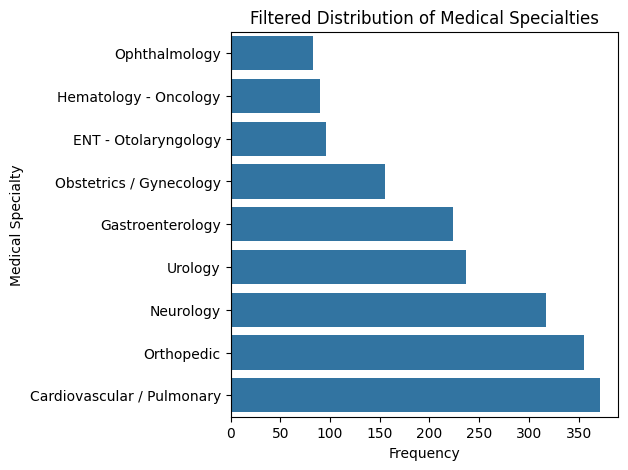

In [9]:
# Plot filtered distribution sorted by count
sorted_data = filtered_medical_specialty['Medical_Specialty'].value_counts().sort_values(ascending=True)
plt.figure(figsize=(5, 5))
sns.barplot(x=sorted_data.values, y=sorted_data.index)
plt.title('Filtered Distribution of Medical Specialties')
plt.xlabel('Frequency')
plt.ylabel('Medical Specialty')
plt.show()


**Creating a Filtered DataFrame with Relevant Columns:**   
This script creates a new DataFrame data containing only the 'Transcription' and 'Medical_Specialty' columns from filtered_data_categories. It then drops rows where 'Transcription' is missing and displays the shape of the resulting DataFrame.

In [51]:
# Create a new DataFrame with only the relevant columns
medical_data = filtered_medical_specialty[['Transcription', 'Medical_Specialty']]

# Drop rows where 'Transcription' is missing
medical_data = medical_data.dropna(subset=['Transcription'])

# Display the shape of the resulting DataFrame
print("Shape of the data after dropping missing transcriptions:", medical_data.shape)
medical_data.head()

# Display a sample of the transcription text
print("Sample of the transcription text:")
print(medical_data['Transcription'].head(5).to_string(index=False))

Shape of the data after dropping missing transcriptions: (1928, 2)
Sample of the transcription text:
2-D M-MODE: , ,1.  Left atrial enlargement with...
1.  The left ventricular cavity size and wall t...
2-D ECHOCARDIOGRAM,Multiple views of the heart ...
DESCRIPTION:,1.  Normal cardiac chambers size.,...
2-D STUDY,1. Mild aortic stenosis, widely calci...


## **DATA PREPROCESSING**

**Text Cleaning:**   
Cleans the medical transcription text

In [11]:
def clean_medical_text(text: str) -> str:
    """
    Cleans medical text data by removing unnecessary characters and formatting,
    while preserving relevant medical information.

    Parameters:
    text (str): The clinical text to clean.
    stop_words (List[str]): A list of stop words to remove from the text.

    Returns:
    str: The cleaned clinical text.
    """

   # Convert text to lowercase to ensure uniformity
    text = text.lower()

    # Remove HTML tags if any
    text = re.sub(r'<[^>]+>', ' ', text)

    # Remove URLs and email addresses
    text = re.sub(r'http\S+|www\S+|https\S+|mailto:\S+', ' ', text)

    # Remove punctuation marks (but keep relevant medical punctuation if necessary)
    text = re.sub(r'[\.\,\?\!\;\:\(\)\[\]\{\}\'\"\\\/]', ' ', text)

    # Remove extra whitespace (extra spaces, tabs, newlines)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove extra numbers
    text = re.sub(r'\d+', '', text)

    # Remove percentage symbols
    text = re.sub(r'%', '', text)

    # Expand contractions using the contractions library
    text = contractions.fix(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    return text

**Text Normalization:**   
Tokenize, remove stopwords, and lemmatize the text

In [12]:
def word_tokenize(text):
    # Tokenize the text into words using NLTK
    words = nltk.word_tokenize(text)
    return words

# def remove_stopwords(tokens):
#     stop_words = set(stopwords.words('english'))
#     filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
#     return filtered_tokens

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

**Processed Medical Data:**   
Here we apply text preprocessing to medical data.

In [13]:
# Apply text preprocessing to medical data
processed_data = []

for index, row in medical_data.iterrows():
    transcription = row['Transcription']

    # Clean the text
    cleaned_text = clean_medical_text(transcription)

    # Tokenize the text
    tokens = word_tokenize(cleaned_text)

    # Lemmatize the tokens
    lemmatized_tokens = lemmatize_tokens(tokens)

# Print a sample transcript after each preprocessing step
    if index == 20:  # Adjust the index as per requirement to print different samples
        print("Original Transcription:\n", transcription)
        print("Cleaned Text:\n", cleaned_text)
        print("Tokens:\n", tokens)
        print("Lemmatized Tokens:\n", lemmatized_tokens)

    processed_data.append({
        'Medical_Specialty': row['Medical_Specialty'],
        'Processed_Transcription': ' '.join(lemmatized_tokens)
    })

# Convert processed data into a DataFrame
processed_medical_data = pd.DataFrame(processed_data)

# Display the shape and head of the processed DataFrame
print("Shape of the processed data:", processed_medical_data.shape)
processed_medical_data.head()

Original Transcription:
 INDICATION:,  Prostate Cancer.,TECHNIQUE:,  3.5 hours following the intravenous administration of 26.5 mCi of Technetium 99m MDP, the skeleton was imaged in the anterior and posterior projections.,FINDINGS:,  There is a focus of abnormal increased tracer activity overlying the right parietal region of the skull.  The uptake in the remainder of the skeleton is within normal limits.  The kidneys image normally.  There is increased activity in the urinary bladder suggesting possible urinary retention.,CONCLUSION:,1.  Focus of abnormal increased tracer activity overlying the right parietal region of the skull.  CT scanning of magnetic resonance imaging of the skull and brain could be done for further assessment if it is clinically indicated.,2.  There is probably some degree of urinary retention.,
Cleaned Text:
 indication prostate cancer technique hours following intravenous administration mci technetium mdp skeleton imaged anterior posterior projections findings 

,Medical_Specialty,Processed_Transcription
0,Cardiovascular / Pulmonary,-d m-mode left atrial enlargement left atrial ...
1,Cardiovascular / Pulmonary,left ventricular cavity size wall thickness ap...
2,Cardiovascular / Pulmonary,-d echocardiogram multiple view heart great ve...
3,Cardiovascular / Pulmonary,description normal cardiac chamber size normal...
4,Cardiovascular / Pulmonary,-d study mild aortic stenosis widely calcified...


## **FEATURE EXTRACTION**

Bag of Words

In [14]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the data
bow_features = vectorizer.fit_transform(processed_medical_data['Processed_Transcription'])

# Convert the BoW features to a DataFrame
bow_df = pd.DataFrame(bow_features.toarray(), columns=vectorizer.get_feature_names_out())

# Display the shape and the first few rows of the BoW DataFrame
print("Shape of BoW features:", bow_df.shape)
bow_df.head()


Shape of BoW features: (1928, 16331)


,___,____,_____,______,_______,________,_________,__________,___________,____________,...,zumi,zygoma,zygomatic,zyloprim,zymar,zyprexa,zyrtec,zyvox,µl,ºf
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF-IDF

In [15]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_features = tfidf_vectorizer.fit_transform(processed_medical_data['Processed_Transcription'])

# Convert the TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape and the first few rows of the TF-IDF DataFrame
print("Shape of TF-IDF features:", tfidf_df.shape)
tfidf_df.head()


Shape of TF-IDF features: (1928, 16331)


,___,____,_____,______,_______,________,_________,__________,___________,____________,...,zumi,zygoma,zygomatic,zyloprim,zymar,zyprexa,zyrtec,zyvox,µl,ºf
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **MODEL TRAINING AND EVALUATION**

 Preparing Features and Labels   
First, we need to prepare our feature matrices and labels.

In [46]:
# Preparing features and labels for model training
X_tfidf = tfidf_df
X_bow = bow_df

y = processed_medical_data['Medical_Specialty'].tolist()

# Splitting the data into training and test sets for each feature extraction method
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=1)
X_train_bow, X_test_bow, _, _ = train_test_split(X_bow, y, test_size=0.2, stratify=y, random_state=1)


Hyperparameter Tuning

In [47]:
def train_and_evaluate(model, param_grid, X_train, X_test, y_train, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predictions and accuracy
    pred_train = best_model.predict(X_train)
    pred_test = best_model.predict(X_test)

    train_acc = best_model.score(X_train, y_train)
    test_acc = best_model.score(X_test, y_test)

    return pred_train, pred_test, train_acc, test_acc, best_model, best_params


**Visualization Functions:**  
This function is defined to generate classification reports and visualize confusion matrices.

In [19]:
def report(true, pred):
    """
    Generate a classification report and visualize the confusion matrix.

    Parameters:
    - true (list): True labels.
    - pred (list): Predicted labels.
    """
    # Calculate the confusion matrix
    cm = confusion_matrix(true, pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

    # Generate and print the classification report
    cf_rep = classification_report(true, pred)
    print("Classification Report:\n", cf_rep)

In [60]:
# Initialize result dictionary
results_dict = {
    'Logistic Regression': {},
    'SVM': {},
    'KNN': {}
}


**Logistic Regression**


Logistic Regression with TF-IDF:


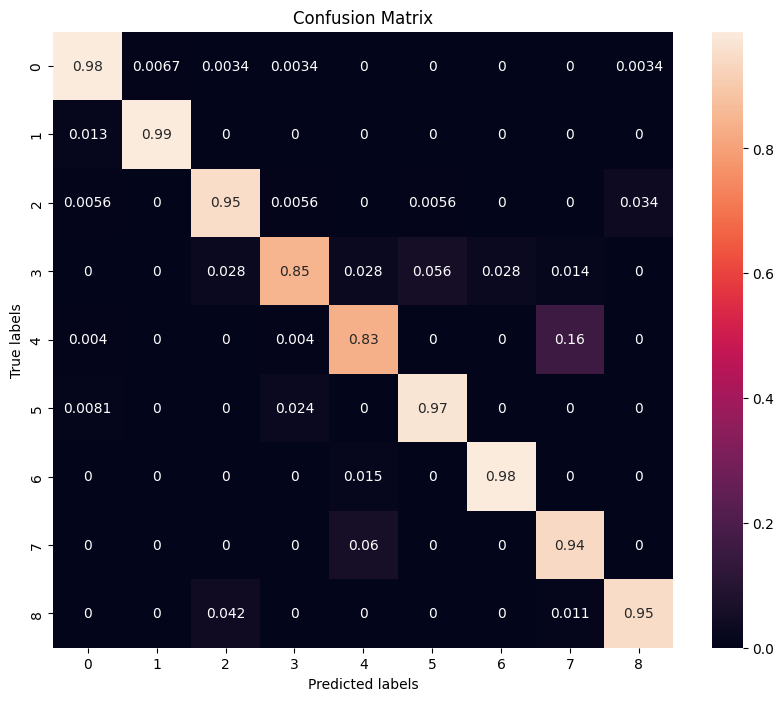

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.99      0.98      0.98       297
      ENT - Otolaryngology       0.97      0.99      0.98        77
          Gastroenterology       0.94      0.95      0.94       179
     Hematology - Oncology       0.91      0.85      0.88        72
                 Neurology       0.91      0.83      0.87       253
   Obstetrics / Gynecology       0.96      0.97      0.96       124
             Ophthalmology       0.97      0.98      0.98        66
                Orthopedic       0.86      0.94      0.90       284
                   Urology       0.96      0.95      0.95       190

                  accuracy                           0.94      1542
                 macro avg       0.94      0.94      0.94      1542
              weighted avg       0.94      0.94      0.93      1542



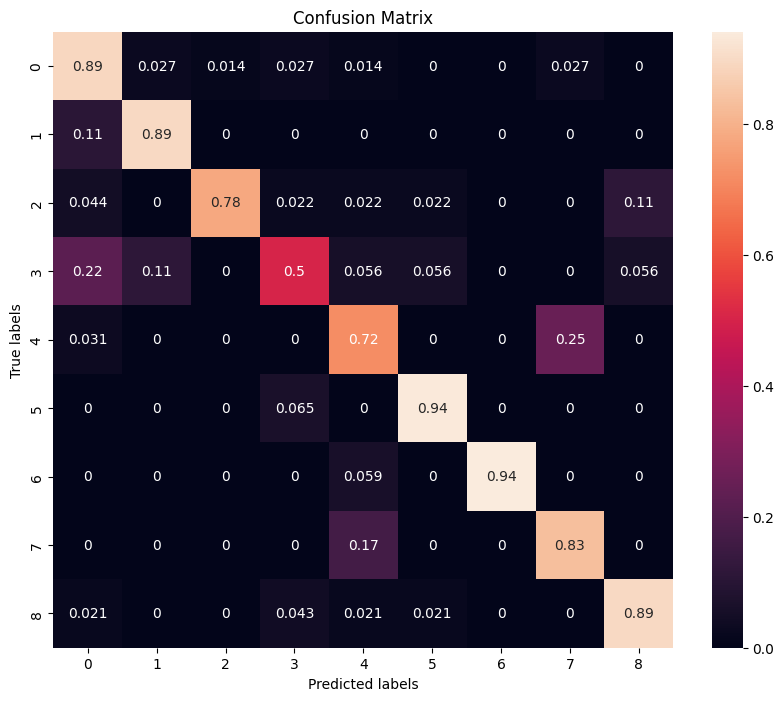

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.86      0.89      0.87        74
      ENT - Otolaryngology       0.81      0.89      0.85        19
          Gastroenterology       0.97      0.78      0.86        45
     Hematology - Oncology       0.56      0.50      0.53        18
                 Neurology       0.73      0.72      0.72        64
   Obstetrics / Gynecology       0.91      0.94      0.92        31
             Ophthalmology       1.00      0.94      0.97        17
                Orthopedic       0.77      0.83      0.80        71
                   Urology       0.88      0.89      0.88        47

                  accuracy                           0.83       386
                 macro avg       0.83      0.82      0.82       386
              weighted avg       0.83      0.83      0.83       386


Logistic Regression with BoW:


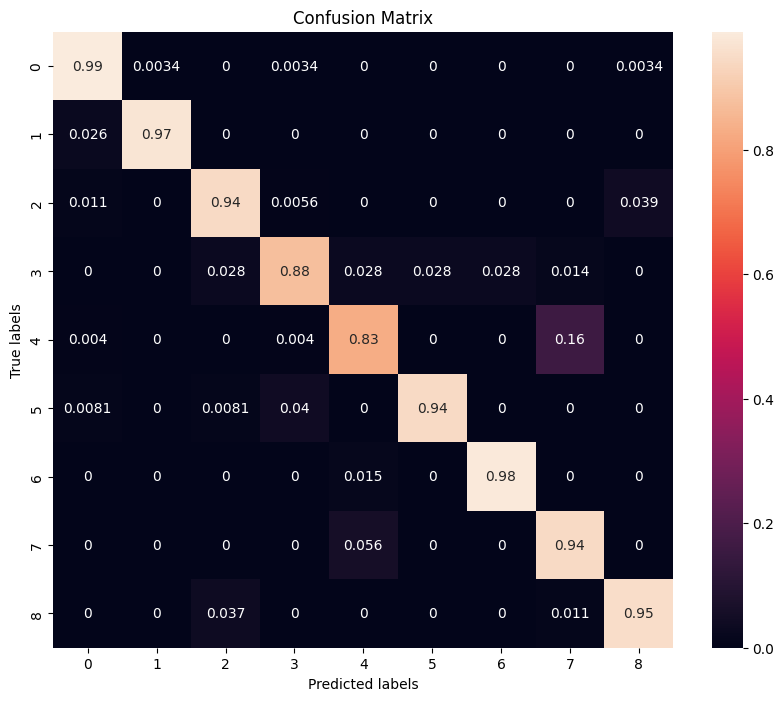

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.98      0.99      0.98       297
      ENT - Otolaryngology       0.99      0.97      0.98        77
          Gastroenterology       0.94      0.94      0.94       179
     Hematology - Oncology       0.89      0.88      0.88        72
                 Neurology       0.92      0.83      0.87       253
   Obstetrics / Gynecology       0.98      0.94      0.96       124
             Ophthalmology       0.97      0.98      0.98        66
                Orthopedic       0.86      0.94      0.90       284
                   Urology       0.96      0.95      0.96       190

                  accuracy                           0.94      1542
                 macro avg       0.94      0.94      0.94      1542
              weighted avg       0.94      0.94      0.93      1542



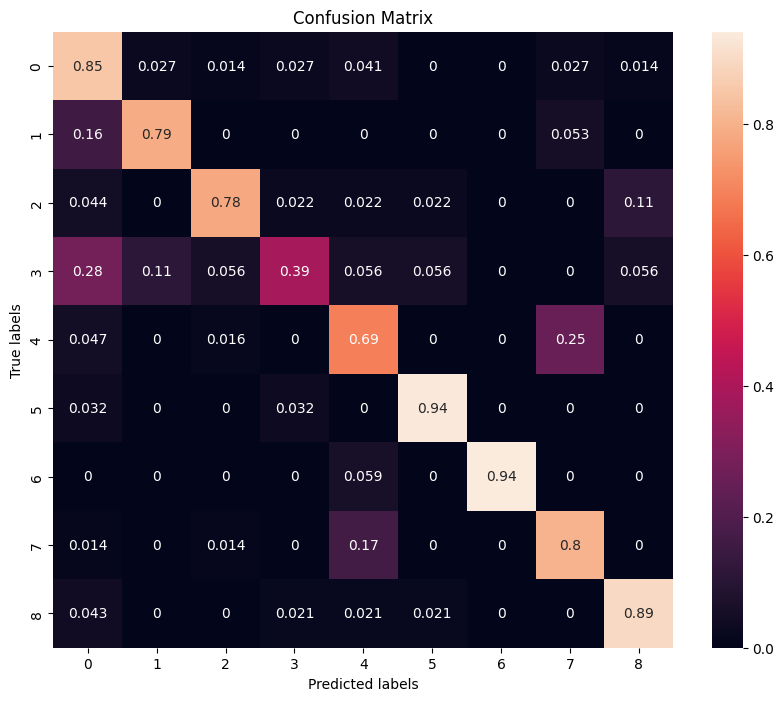

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.79      0.85      0.82        74
      ENT - Otolaryngology       0.79      0.79      0.79        19
          Gastroenterology       0.90      0.78      0.83        45
     Hematology - Oncology       0.58      0.39      0.47        18
                 Neurology       0.70      0.69      0.69        64
   Obstetrics / Gynecology       0.91      0.94      0.92        31
             Ophthalmology       1.00      0.94      0.97        17
                Orthopedic       0.75      0.80      0.78        71
                   Urology       0.86      0.89      0.88        47

                  accuracy                           0.80       386
                 macro avg       0.81      0.79      0.79       386
              weighted avg       0.80      0.80      0.80       386



In [61]:
# # Define the Logistic Regression model and parameter grid
# logreg = LogisticRegression(solver='liblinear', max_iter=1000)
# param_grid_logreg = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 1000]}

# # Logistic Regression with TF-IDF
# print("\nLogistic Regression with TF-IDF:")
# pred_train_tfidf, pred_test_tfidf, train_acc_tfidf, test_acc_tfidf, best_logreg_tfidf, best_params_logreg_tfidf = train_and_evaluate(
#     logreg, param_grid_logreg, X_train_tfidf, X_test_tfidf, y_train, y_test)
# print(f"Train Accuracy: {train_acc_tfidf}, Test Accuracy: {test_acc_tfidf}")
# print("Best Parameters for Logistic Regression with TF-IDF:", best_params_logreg_tfidf)
# report(y_train, pred_train_tfidf)
# report(y_test, pred_test_tfidf)

# # Logistic Regression with BoW
# print("\nLogistic Regression with BoW:")
# pred_train_bow, pred_test_bow, train_acc_bow, test_acc_bow, best_logreg_bow, best_params_logreg_bow = train_and_evaluate(
#     logreg, param_grid_logreg, X_train_bow, X_test_bow, y_train, y_test)
# print(f"Train Accuracy: {train_acc_bow}, Test Accuracy: {test_acc_bow}")
# print("Best Parameters for Logistic Regression with BoW:", best_params_logreg_bow)
# report(y_train, pred_train_bow)
# report(y_test, pred_test_bow)

# Logistic Regression
logreg = LogisticRegression(solver='liblinear', max_iter=1000)
param_grid_logreg = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 1000]}

# Train and evaluate for each feature extraction
print("\nLogistic Regression with TF-IDF:")
pred_train, pred_test, train_acc, test_acc, best_model, best_params = train_and_evaluate(
    logreg, param_grid_logreg, X_train_tfidf, X_test_tfidf, y_train, y_test)
results_dict['Logistic Regression']['TF-IDF'] = {'train_acc': train_acc, 'test_acc': test_acc, 'best_params': best_params}
report(y_train, pred_train)
report(y_test, pred_test)

print("\nLogistic Regression with BoW:")
pred_train, pred_test, train_acc, test_acc, best_model, best_params = train_and_evaluate(
    logreg, param_grid_logreg, X_train_bow, X_test_bow, y_train, y_test)
results_dict['Logistic Regression']['BoW'] = {'train_acc': train_acc, 'test_acc': test_acc, 'best_params': best_params}
report(y_train, pred_train)
report(y_test, pred_test)


Support Vector Machine (SVM)


SVM with TF-IDF:


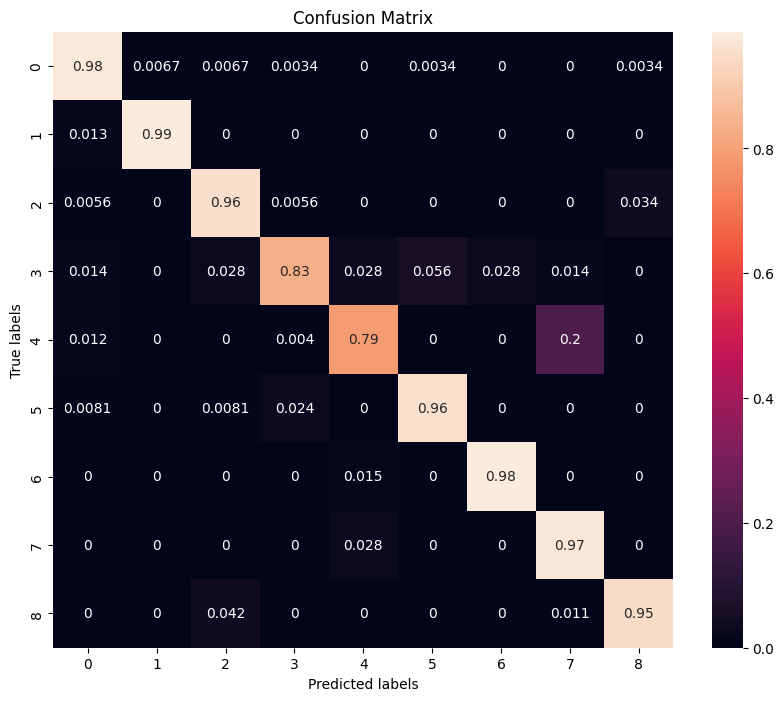

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.98      0.98      0.98       297
      ENT - Otolaryngology       0.97      0.99      0.98        77
          Gastroenterology       0.93      0.96      0.94       179
     Hematology - Oncology       0.91      0.83      0.87        72
                 Neurology       0.95      0.79      0.86       253
   Obstetrics / Gynecology       0.96      0.96      0.96       124
             Ophthalmology       0.97      0.98      0.98        66
                Orthopedic       0.84      0.97      0.90       284
                   Urology       0.96      0.95      0.95       190

                  accuracy                           0.93      1542
                 macro avg       0.94      0.93      0.94      1542
              weighted avg       0.93      0.93      0.93      1542



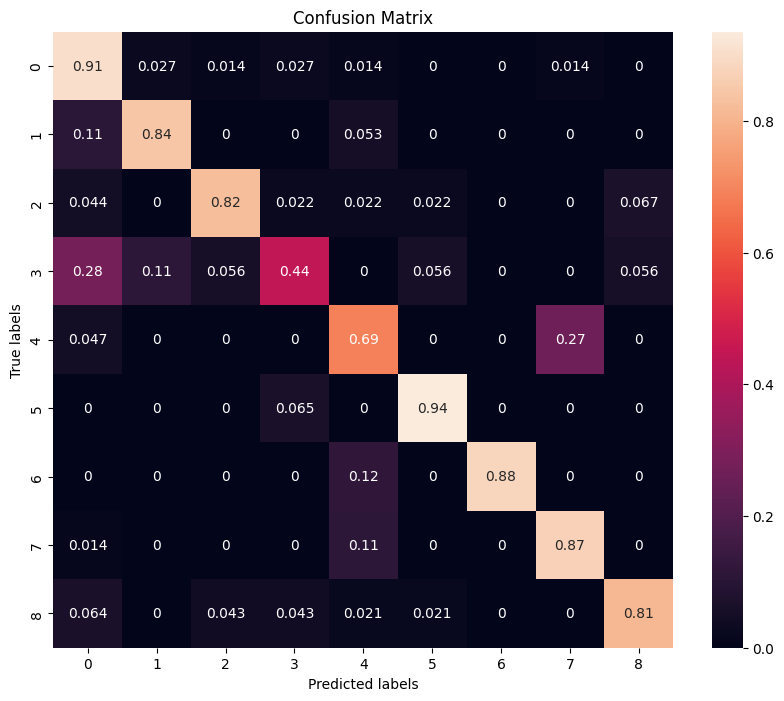

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.81      0.91      0.85        74
      ENT - Otolaryngology       0.80      0.84      0.82        19
          Gastroenterology       0.90      0.82      0.86        45
     Hematology - Oncology       0.53      0.44      0.48        18
                 Neurology       0.76      0.69      0.72        64
   Obstetrics / Gynecology       0.91      0.94      0.92        31
             Ophthalmology       1.00      0.88      0.94        17
                Orthopedic       0.78      0.87      0.82        71
                   Urology       0.90      0.81      0.85        47

                  accuracy                           0.82       386
                 macro avg       0.82      0.80      0.81       386
              weighted avg       0.82      0.82      0.82       386


SVM with BoW:


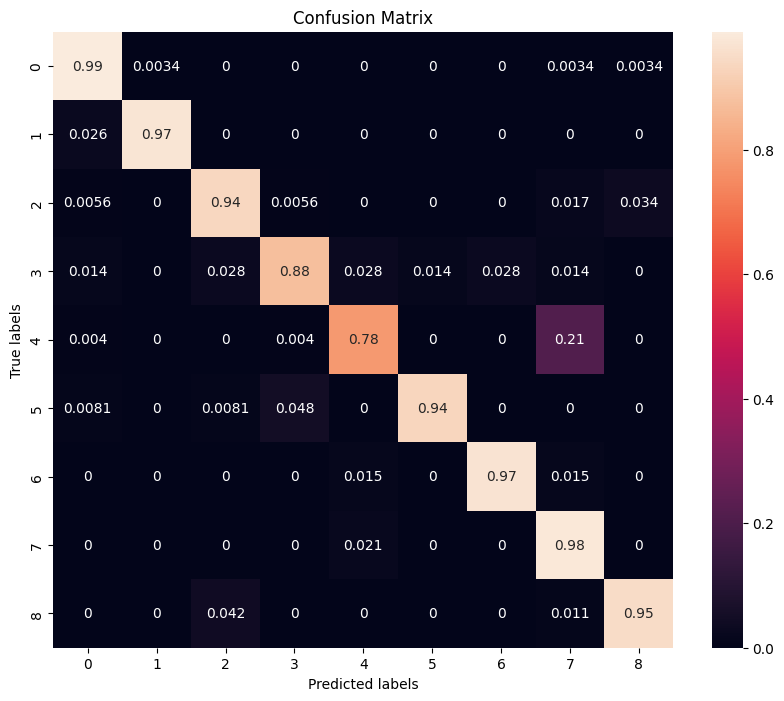

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.98      0.99      0.98       297
      ENT - Otolaryngology       0.99      0.97      0.98        77
          Gastroenterology       0.94      0.94      0.94       179
     Hematology - Oncology       0.89      0.88      0.88        72
                 Neurology       0.96      0.78      0.86       253
   Obstetrics / Gynecology       0.99      0.94      0.96       124
             Ophthalmology       0.97      0.97      0.97        66
                Orthopedic       0.82      0.98      0.89       284
                   Urology       0.96      0.95      0.95       190

                  accuracy                           0.93      1542
                 macro avg       0.94      0.93      0.94      1542
              weighted avg       0.94      0.93      0.93      1542



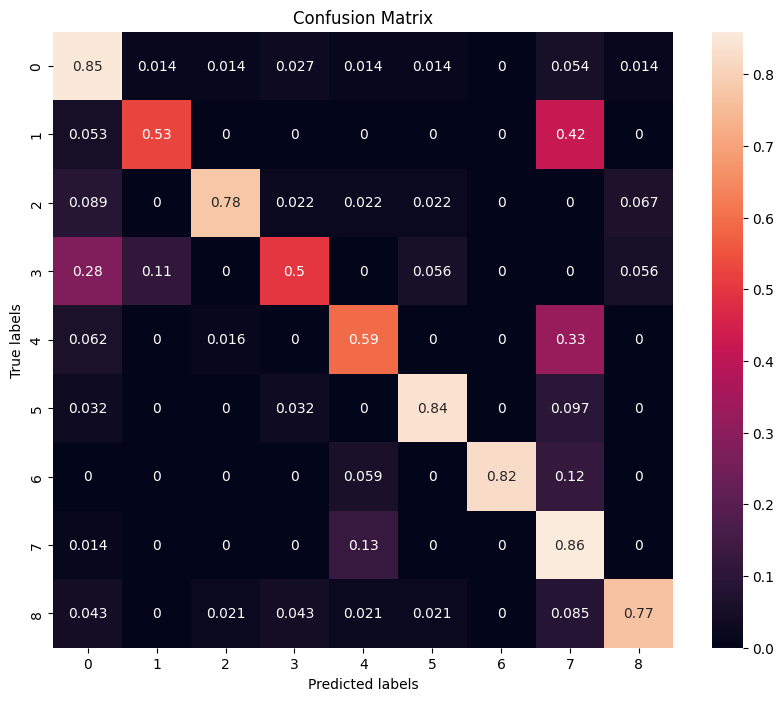

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.78      0.85      0.81        74
      ENT - Otolaryngology       0.77      0.53      0.62        19
          Gastroenterology       0.92      0.78      0.84        45
     Hematology - Oncology       0.60      0.50      0.55        18
                 Neurology       0.75      0.59      0.66        64
   Obstetrics / Gynecology       0.87      0.84      0.85        31
             Ophthalmology       1.00      0.82      0.90        17
                Orthopedic       0.59      0.86      0.70        71
                   Urology       0.88      0.77      0.82        47

                  accuracy                           0.76       386
                 macro avg       0.79      0.73      0.75       386
              weighted avg       0.78      0.76      0.76       386



In [62]:
# # Define the SVM model and parameter grid
# svm = SVC()
# param_grid_svm = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}
# # SVM with TF-IDF

# print("\nSVM with TF-IDF:")
# pred_train_tfidf, pred_test_tfidf, train_acc_tfidf, test_acc_tfidf, best_svm_tfidf, best_params_svm_tfidf = train_and_evaluate(
#     svm, param_grid_svm, X_train_tfidf, X_test_tfidf, y_train, y_test)
# print(f"Train Accuracy: {train_acc_tfidf}, Test Accuracy: {test_acc_tfidf}")
# print("Best Parameters for SVM with TF-IDF:", best_params_svm_tfidf)
# report(y_train, pred_train_tfidf)
# report(y_test, pred_test_tfidf)

# # SVM with BoW
# print("\nSVM with BoW:")
# pred_train_bow, pred_test_bow, train_acc_bow, test_acc_bow, best_svm_bow, best_params_svm_bow = train_and_evaluate(
#     svm, param_grid_svm, X_train_bow, X_test_bow, y_train, y_test)
# print(f"Train Accuracy: {train_acc_bow}, Test Accuracy: {test_acc_bow}")
# print("Best Parameters for SVM with BoW:", best_params_svm_bow)
# report(y_train, pred_train_bow)
# report(y_test, pred_test_bow)


# SVM
svm = SVC()
param_grid_svm = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']}

print("\nSVM with TF-IDF:")
pred_train, pred_test, train_acc, test_acc, best_model, best_params = train_and_evaluate(
    svm, param_grid_svm, X_train_tfidf, X_test_tfidf, y_train, y_test)
results_dict['SVM']['TF-IDF'] = {'train_acc': train_acc, 'test_acc': test_acc, 'best_params': best_params}
report(y_train, pred_train)
report(y_test, pred_test)

print("\nSVM with BoW:")
pred_train, pred_test, train_acc, test_acc, best_model, best_params = train_and_evaluate(
    svm, param_grid_svm, X_train_bow, X_test_bow, y_train, y_test)
results_dict['SVM']['BoW'] = {'train_acc': train_acc, 'test_acc': test_acc, 'best_params': best_params}
report(y_train, pred_train)
report(y_test, pred_test)

K-Nearest Neighbors (KNN)


KNN with TF-IDF:


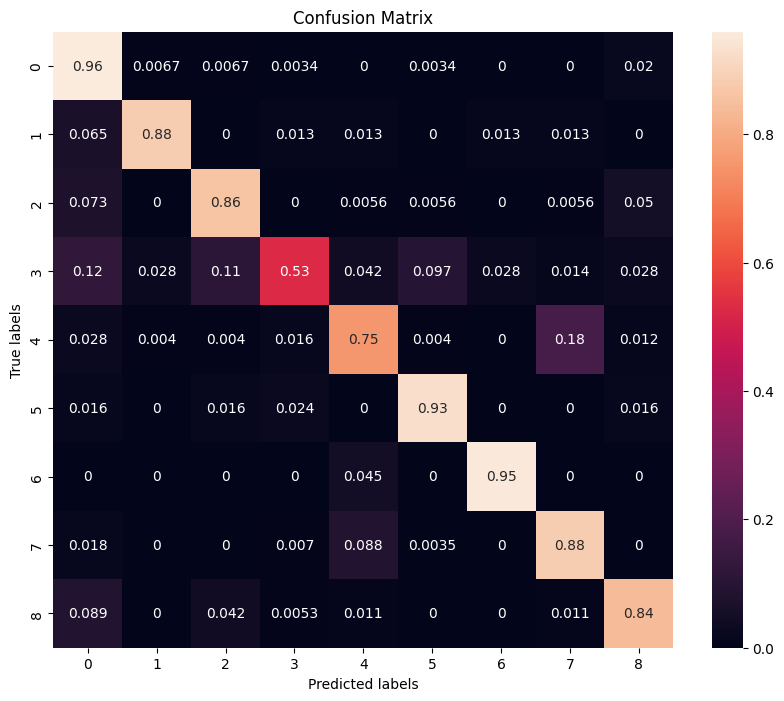

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.83      0.96      0.89       297
      ENT - Otolaryngology       0.93      0.88      0.91        77
          Gastroenterology       0.88      0.86      0.87       179
     Hematology - Oncology       0.76      0.53      0.62        72
                 Neurology       0.85      0.75      0.80       253
   Obstetrics / Gynecology       0.91      0.93      0.92       124
             Ophthalmology       0.95      0.95      0.95        66
                Orthopedic       0.83      0.88      0.86       284
                   Urology       0.88      0.84      0.86       190

                  accuracy                           0.86      1542
                 macro avg       0.87      0.84      0.85      1542
              weighted avg       0.86      0.86      0.86      1542



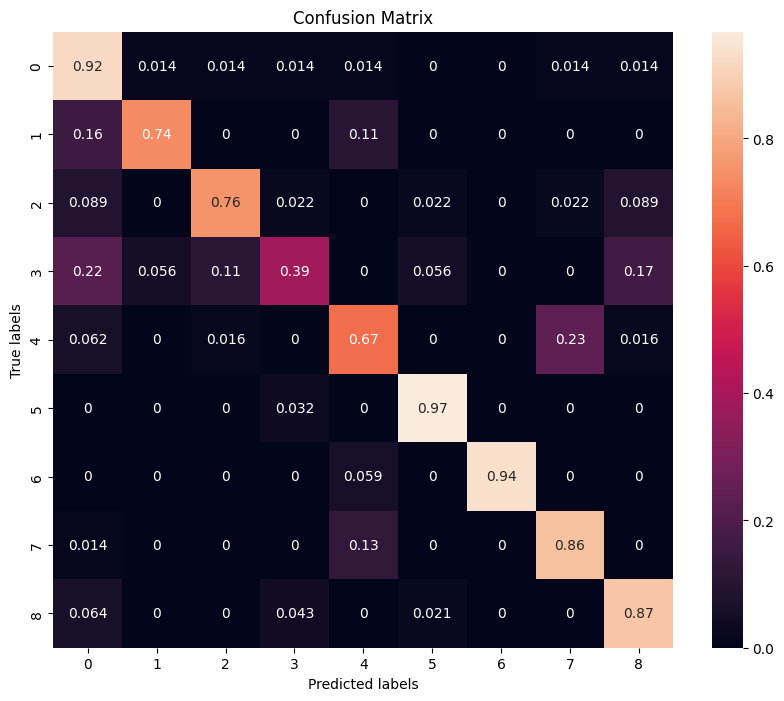

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.78      0.92      0.84        74
      ENT - Otolaryngology       0.88      0.74      0.80        19
          Gastroenterology       0.89      0.76      0.82        45
     Hematology - Oncology       0.58      0.39      0.47        18
                 Neurology       0.77      0.67      0.72        64
   Obstetrics / Gynecology       0.91      0.97      0.94        31
             Ophthalmology       1.00      0.94      0.97        17
                Orthopedic       0.78      0.86      0.82        71
                   Urology       0.82      0.87      0.85        47

                  accuracy                           0.81       386
                 macro avg       0.82      0.79      0.80       386
              weighted avg       0.81      0.81      0.81       386


KNN with BoW:


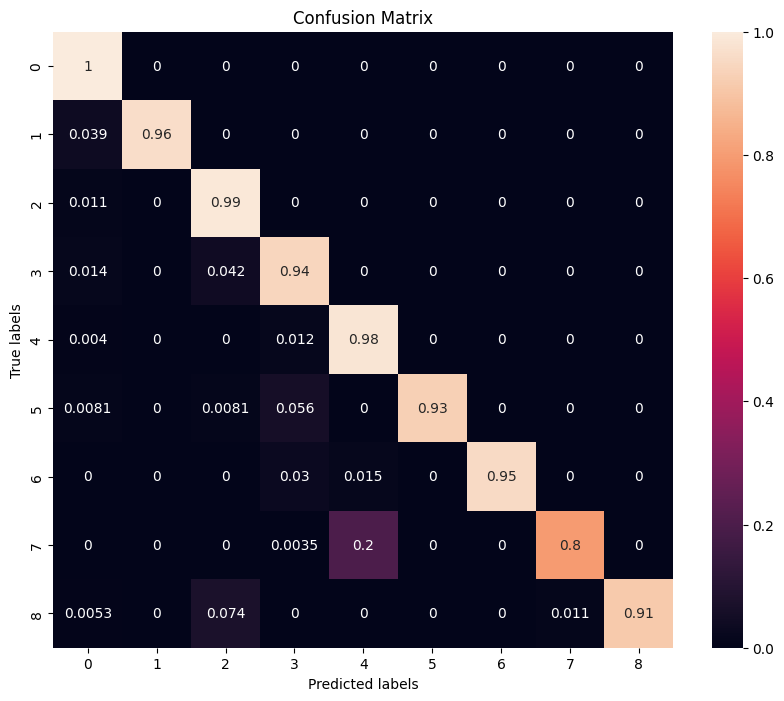

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.97      1.00      0.99       297
      ENT - Otolaryngology       1.00      0.96      0.98        77
          Gastroenterology       0.91      0.99      0.95       179
     Hematology - Oncology       0.84      0.94      0.89        72
                 Neurology       0.81      0.98      0.89       253
   Obstetrics / Gynecology       1.00      0.93      0.96       124
             Ophthalmology       1.00      0.95      0.98        66
                Orthopedic       0.99      0.80      0.88       284
                   Urology       1.00      0.91      0.95       190

                  accuracy                           0.94      1542
                 macro avg       0.95      0.94      0.94      1542
              weighted avg       0.94      0.94      0.94      1542



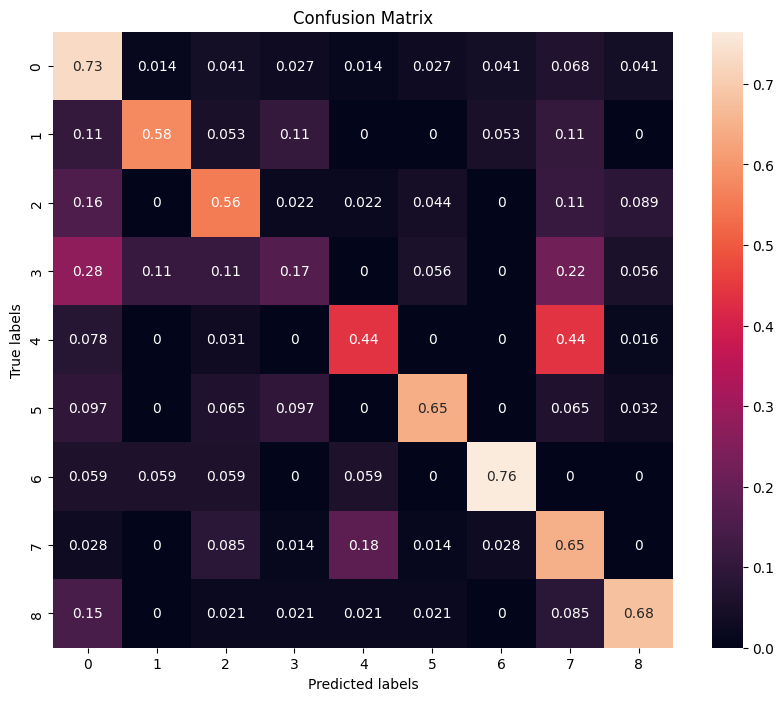

Classification Report:
                             precision    recall  f1-score   support

Cardiovascular / Pulmonary       0.63      0.73      0.68        74
      ENT - Otolaryngology       0.73      0.58      0.65        19
          Gastroenterology       0.58      0.56      0.57        45
     Hematology - Oncology       0.23      0.17      0.19        18
                 Neurology       0.62      0.44      0.51        64
   Obstetrics / Gynecology       0.74      0.65      0.69        31
             Ophthalmology       0.68      0.76      0.72        17
                Orthopedic       0.48      0.65      0.55        71
                   Urology       0.76      0.68      0.72        47

                  accuracy                           0.60       386
                 macro avg       0.61      0.58      0.59       386
              weighted avg       0.61      0.60      0.60       386



In [63]:
# # Define the KNN model and parameter grid
# knn = KNeighborsClassifier()
# param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
# # KNN with TF-IDF

# print("\nKNN with TF-IDF:")
# pred_train_tfidf, pred_test_tfidf, train_acc_tfidf, test_acc_tfidf, best_knn_tfidf, best_params_knn_tfidf = train_and_evaluate(
#     knn, param_grid_knn, X_train_tfidf, X_test_tfidf, y_train, y_test)
# print(f"Train Accuracy: {train_acc_tfidf}, Test Accuracy: {test_acc_tfidf}")
# print("Best Parameters for KNN with TF-IDF:", best_params_knn_tfidf)
# report(y_train, pred_train_tfidf)
# report(y_test, pred_test_tfidf)

# # KNN with BoW
# print("\nKNN with BoW:")
# pred_train_bow, pred_test_bow, train_acc_bow, test_acc_bow, best_knn_bow, best_params_knn_bow = train_and_evaluate(
#     knn, param_grid_knn, X_train_bow, X_test_bow, y_train, y_test)
# print(f"Train Accuracy: {train_acc_bow}, Test Accuracy: {test_acc_bow}")
# print("Best Parameters for KNN with BoW:", best_params_knn_bow)
# report(y_train, pred_train_bow)
# report(y_test, pred_test_bow)

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

print("\nKNN with TF-IDF:")
pred_train, pred_test, train_acc, test_acc, best_model, best_params = train_and_evaluate(
    knn, param_grid_knn, X_train_tfidf, X_test_tfidf, y_train, y_test)
results_dict['KNN']['TF-IDF'] = {'train_acc': train_acc, 'test_acc': test_acc, 'best_params': best_params}
report(y_train, pred_train)
report(y_test, pred_test)

print("\nKNN with BoW:")
pred_train, pred_test, train_acc, test_acc, best_model, best_params = train_and_evaluate(
    knn, param_grid_knn, X_train_bow, X_test_bow, y_train, y_test)
results_dict['KNN']['BoW'] = {'train_acc': train_acc, 'test_acc': test_acc, 'best_params': best_params}
report(y_train, pred_train)
report(y_test, pred_test)

Summary Table for Classifier Results

In [64]:
# Compile results
results_df = pd.DataFrame([
    {'Model': model, 'Feature Extraction': fe, 'Train Accuracy': res['train_acc'], 'Test Accuracy': res['test_acc'], 'Best Parameters': res['best_params']}
    for model, fes in results_dict.items()
    for fe, res in fes.items()
])

print(results_df)


                 Model Feature Extraction  Train Accuracy  Test Accuracy  \
0  Logistic Regression             TF-IDF        0.935149       0.826425   
1  Logistic Regression                BoW        0.935149       0.797927   
2                  SVM             TF-IDF        0.931258       0.818653   
3                  SVM                BoW        0.931258       0.756477   
4                  KNN             TF-IDF        0.859274       0.813472   
5                  KNN                BoW        0.935149       0.601036   

                             Best Parameters  
0               {'C': 1000, 'penalty': 'l2'}  
1                  {'C': 1, 'penalty': 'l2'}  
2               {'C': 1, 'kernel': 'linear'}  
3                 {'C': 10, 'kernel': 'rbf'}  
4   {'n_neighbors': 7, 'weights': 'uniform'}  
5  {'n_neighbors': 3, 'weights': 'distance'}  


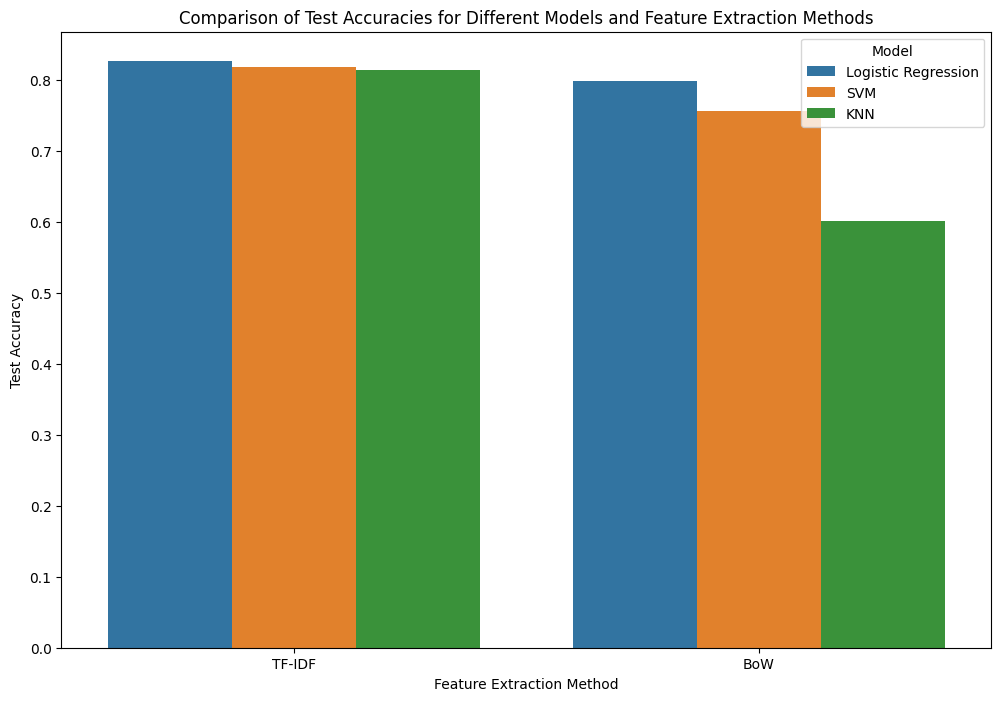

In [65]:
# Plot the comparison of test accuracies
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature Extraction', y='Test Accuracy', hue='Model', data=results_df)
plt.title('Comparison of Test Accuracies for Different Models and Feature Extraction Methods')
plt.xlabel('Feature Extraction Method')
plt.ylabel('Test Accuracy')
plt.legend(title='Model')
plt.show()


Visualization of Results Comparison